## 머신러닝 데이터 전처리

In [2]:
from sklearn.preprocessing import LabelEncoder
import pandas as pd

### Label encoding
- sklearn.preprocessing LabelEncoder()

In [3]:
# label encoding
items = ["tv", "냉장고", "컴퓨터", "전자레인지", "믹서", "선풍기", "믹서"]
encoder = LabelEncoder()
encoder.fit(items)
labels = encoder.transform(items)

In [4]:
print('labels:',labels)
print('encoder.classes',encoder.classes_)
print('encoder.inverse_transform :',encoder.inverse_transform([4, 5, 3, 2, 4, 2, 0, 1, 1]))

labels: [0 1 5 4 2 3 2]
encoder.classes ['tv' '냉장고' '믹서' '선풍기' '전자레인지' '컴퓨터']
encoder.inverse_transform : ['전자레인지' '컴퓨터' '선풍기' '믹서' '전자레인지' '믹서' 'tv' '냉장고' '냉장고']


### one-hot encoding
- pandas get_dummies(dataframe)

In [7]:
# one-hot encoding using pandas
df = pd.DataFrame({'items':items})

In [8]:
print(df)
print(pd.get_dummies(df)) # 데이터 프레임 안에서 범주형 자료만 input으로 넣어야하나?

   items
0     tv
1    냉장고
2    컴퓨터
3  전자레인지
4     믹서
5    선풍기
6     믹서
   items_tv  items_냉장고  items_믹서  items_선풍기  items_전자레인지  items_컴퓨터
0         1          0         0          0            0          0
1         0          1         0          0            0          0
2         0          0         0          0            0          1
3         0          0         0          0            1          0
4         0          0         1          0            0          0
5         0          0         0          1            0          0
6         0          0         1          0            0          0


### 데이터 스케일링
- StandardScaler
- MinMaxScaler
- RobustScaler
- Normalizer <br>
피처(feature)들마다 데이터 값의 범위가 다르기 때문에 범위 차이가 클경우 데이터
를 갖고 모델링할때 0으로 수렴하거나 무한으로 발산
모든 피처들의 데이터 분포나 범위를 동일하게 조정

### SVM - 유방암 데이터 셋 실습

In [3]:
import sklearn
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import load_breast_cancer

In [12]:
# data load
cancer = load_breast_cancer()
cancer_df = pd.DataFrame(data = cancer.data, columns = cancer.feature_names)
cancer_df['target'] = cancer.target
print(dir(cancer))
print(cancer_df.head())

['DESCR', 'data', 'data_module', 'feature_names', 'filename', 'frame', 'target', 'target_names']
   mean radius  mean texture  mean perimeter  mean area  mean smoothness  \
0        17.99         10.38          122.80     1001.0          0.11840   
1        20.57         17.77          132.90     1326.0          0.08474   
2        19.69         21.25          130.00     1203.0          0.10960   
3        11.42         20.38           77.58      386.1          0.14250   
4        20.29         14.34          135.10     1297.0          0.10030   

   mean compactness  mean concavity  mean concave points  mean symmetry  \
0           0.27760          0.3001              0.14710         0.2419   
1           0.07864          0.0869              0.07017         0.1812   
2           0.15990          0.1974              0.12790         0.2069   
3           0.28390          0.2414              0.10520         0.2597   
4           0.13280          0.1980              0.10430         0.1809

In [15]:
# EDA
print(cancer_df.info())
print(cancer_df.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothness error         5

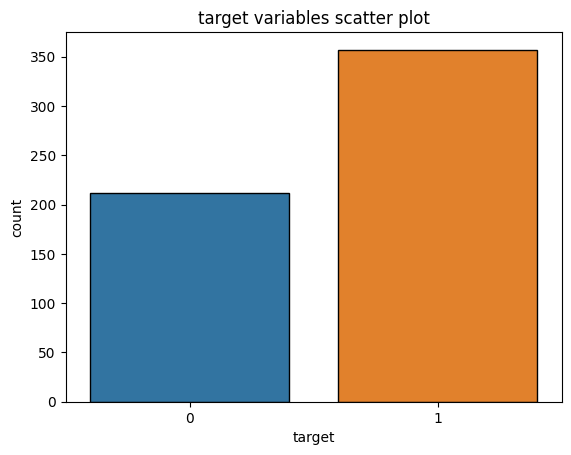

In [42]:
# 시각화

x = cancer_df[cancer_df['target'] == 0]
y = cancer_df[cancer_df['target'] == 1]

sns.countplot([x['target'],y['target']], edgecolor = 'black')
plt.title("target variables scatter plot")
plt.xlabel('target')
plt.show()

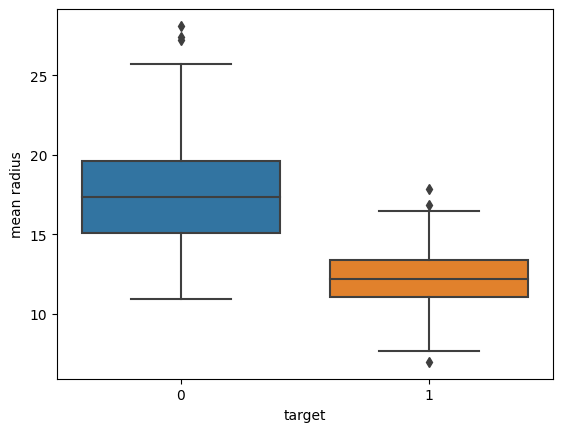

In [53]:
# 첫번째 컬럼과 target 변수의 boxplot
sns.boxplot(x = 'target', y=cancer_df.columns[0],data=cancer_df)
plt.show()

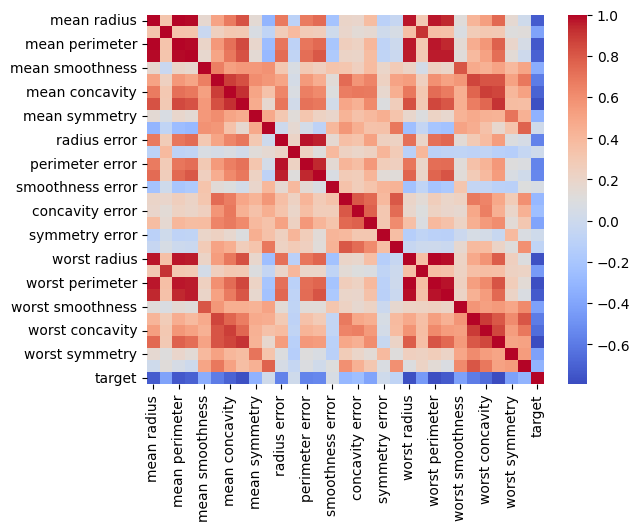

In [59]:
# correlation matrix heatmap
correlation_matrix = cancer_df.corr()
sns.heatmap(correlation_matrix, cmap='coolwarm')
plt.show()

In [72]:
# corrleation 0.5이상의 컬럼들.
high_corr_col = list(correlation_matrix[abs(correlation_matrix['target']) >= 0.5]['target'].index)
len(high_corr_col)

16

In [76]:
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, test_size=0.2, random_state=3)
dtc = DecisionTreeClassifier()
dtc.fit(X_train, y_train)
print('모델의 정확도 :', round(dtc.score(X_test, y_test), 4))

모델의 정확도 : 0.9123


In [77]:
# StandardScaler : 평균이 0이고 분산이 1인 정규 분포로 만드는 것, 표준편차란 평균으로부터 얼마나 떨어져있는지를 구한 것

from sklearn.preprocessing import StandardScaler

# Standardization 평균 0 / 분산 1
std = StandardScaler()

# 교차검증시
std.fit(X_train)
X_train_scaled = std.transform(X_train)
X_test_scaled = std.transform(X_test)
dtc.fit(X_train_scaled, y_train)

print('모델의 정확도 :', round(dtc.score(X_test_scaled, y_test), 4))

모델의 정확도 : 0.8947


In [78]:
X_train_scaled_ss = X_train_scaled.reshape(13650,1)
X_train_data = X_train.reshape(13650,1)

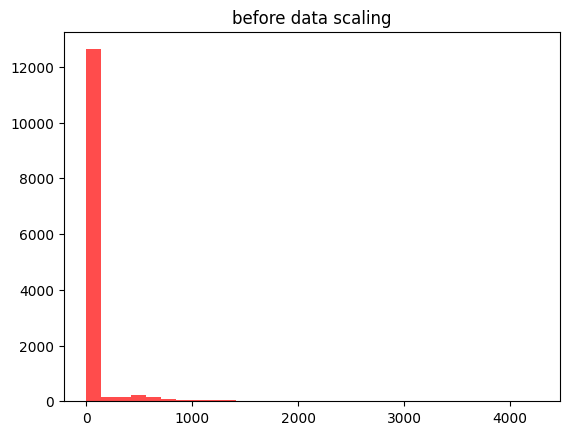

In [80]:
plt.hist(X_train_data, bins=30, color= 'red', alpha = 0.7)
plt.title('before data scaling')
plt.show()

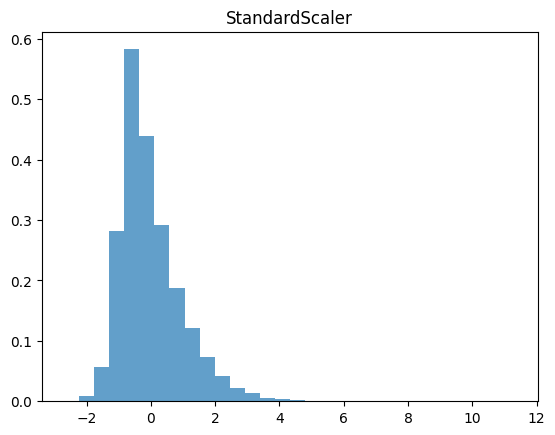

In [81]:
plt.hist(X_train_scaled_ss, bins=30, alpha = 0.7, density = True)
plt.title('StandardScaler')
plt.show()

In [84]:
#MinMaxScaler()
from sklearn.preprocessing import MinMaxScaler

#normalization 최소값 0 / 최대값 1
mms = MinMaxScaler()

#교차검증시
mms.fit(X_train)
X_train_scaled_mms = mms.transform(X_train)
X_test_scaled_mms = mms.transform(X_test)
dtc.fit(X_train_scaled_mms, y_train)

print('모델의 정확도 :', round(dtc.score(X_test_scaled_mms, y_test), 4))

모델의 정확도 : 0.8947


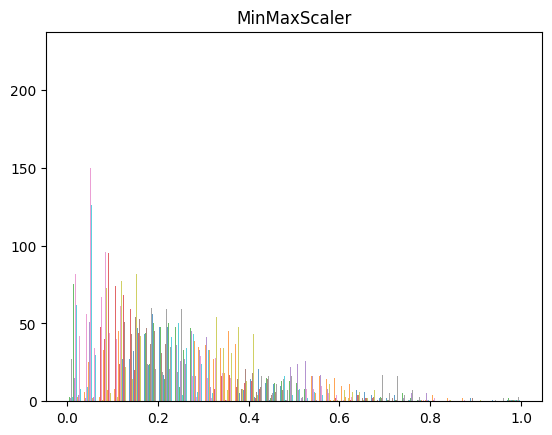

In [86]:
#스케일링 후의 데이터 값들이 0과 1사이에 분포
plt.hist(X_train_scaled_mms, bins=30, alpha = 0.7)
plt.title('MinMaxScaler')
plt.show()

In [87]:
# MaxAbsScaler() : 최대값은 1 최소값은 0으로 최소-최대 정규화 Min-Max Normalization 이상치에 취약


from sklearn.preprocessing import MaxAbsScaler

#절대값
scaler = MaxAbsScaler()

#교차검증시
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

dtc.fit(X_train_scaled, y_train)
print('모델의 정확도 :', round(dtc.score(X_test_scaled, y_test), 4))

모델의 정확도 : 0.886


In [88]:
# RobustScaler(): 중앙값은 0 / IQR(1분위(25%) ~ 3분위(75%)) = 1, 이상치(outlier) 영향 최소화하고 더 넓게 분포 됨

from sklearn.preprocessing import RobustScaler

#중앙값0/IQR 1
rbs = RobustScaler()

#교차검증시
X_train_scaled = rbs.fit_transform(X_train)
X_test_scaled = rbs.transform(X_test)
dtc.fit(X_train_scaled, y_train)

print('모델의 정확도 :', round(dtc.score(X_test_scaled, y_test), 4))

모델의 정확도 : 0.886


In [89]:
from sklearn import svm, datasets
cancer = datasets.load_breast_cancer()
cancer.keys()


dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [90]:
import pandas as pd
dfX = pd.DataFrame(cancer.data, columns=cancer.feature_names)
dfy = pd.DataFrame(cancer.target, columns=['target'])
print('features ;', dfX.shape)
print('lable : ', dfy.shape)

features ; (569, 30)
lable :  (569, 1)


In [91]:
#데이터 분할

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(dfX, dfy, test_size=0.2, random_state=42)
print(X_train.shape, X_test.shape)
print(y_train.shape, y_test.shape)

(455, 30) (114, 30)
(455, 1) (114, 1)


In [92]:
# 데이터 스케일링
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()

X_train = sc.fit_transform(X_train)
y_train = y_train.values
X_train[:3, :]

array([[-1.44075296, -0.43531947, -1.36208497, -1.1391179 ,  0.78057331,
         0.71892128,  2.82313451, -0.11914956,  1.09266219,  2.45817261,
        -0.26380039, -0.01605246, -0.47041357, -0.47476088,  0.83836493,
         3.25102691,  8.43893667,  3.39198733,  2.62116574,  2.06120787,
        -1.23286131, -0.47630949, -1.24792009, -0.97396758,  0.72289445,
         1.18673232,  4.67282796,  0.9320124 ,  2.09724217,  1.88645014],
       [ 1.97409619,  1.73302577,  2.09167167,  1.85197292,  1.319843  ,
         3.42627493,  2.01311199,  2.66503199,  2.1270036 ,  1.55839569,
         0.80531919, -0.81268678,  0.75195659,  0.87716951, -0.89605315,
         1.18122247,  0.18362761,  0.60059598, -0.31771686,  0.52963649,
         2.17331385,  1.3112795 ,  2.08161691,  2.1374055 ,  0.76192793,
         3.26560084,  1.92862053,  2.6989469 ,  1.89116053,  2.49783848],
       [-1.39998202, -1.24962228, -1.34520926, -1.10978518, -1.33264483,
        -0.30735463, -0.36555756, -0.69650228,  1

In [93]:
X_test = sc.transform(X_test)
y_test = y_test.values


In [96]:
from sklearn.svm import SVC

svc = SVC(kernel='linear')
svc.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVC(kernel='linear')

In [97]:
y_test = y_test.flatten()
y_pred = svc.predict(X_test)
y_pred

array([1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1,
       0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1,
       0, 1, 0, 0])

In [98]:
from sklearn.metrics import *

print("정확도 : ", accuracy_score(y_test, y_pred))

정확도 :  0.956140350877193


### 펭귄 데이터 실습

In [104]:
peng_df = pd.read_csv('./penguins 2.csv')
peng_df = peng_df.drop(peng_df.columns[0], axis = 1)
peng_df.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,male,2007
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,female,2007
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,female,2007
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN,2007
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,female,2007


In [105]:
peng_df.info()
peng_df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            344 non-null    object 
 1   island             344 non-null    object 
 2   bill_length_mm     342 non-null    float64
 3   bill_depth_mm      342 non-null    float64
 4   flipper_length_mm  342 non-null    float64
 5   body_mass_g        342 non-null    float64
 6   sex                333 non-null    object 
 7   year               344 non-null    int64  
dtypes: float64(4), int64(1), object(3)
memory usage: 21.6+ KB


,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,year
count,342.000000,342.000000,342.000000,342.000000,344.000000
mean,43.921930,17.151170,200.915205,4201.754386,2008.029070
std,5.459584,1.974793,14.061714,801.954536,0.818356
min,32.100000,13.100000,172.000000,2700.000000,2007.000000
25%,39.225000,15.600000,190.000000,3550.000000,2007.000000
50%,44.450000,17.300000,197.000000,4050.000000,2008.000000
75%,48.500000,18.700000,213.000000,4750.000000,2009.000000
max,59.600000,21.500000,231.000000,6300.000000,2009.000000


In [109]:
#data preprocessing
df1 = peng_df.copy(deep=True)

#data 확인  : 결측치, 이상치
df1_drop = df1.dropna()
df1_fill = df1.fillna(df1.mean())
# df1_fill = df1_fill.dropna()

print(df1_drop.info(),df1_fill.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 333 entries, 0 to 343
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            333 non-null    object 
 1   island             333 non-null    object 
 2   bill_length_mm     333 non-null    float64
 3   bill_depth_mm      333 non-null    float64
 4   flipper_length_mm  333 non-null    float64
 5   body_mass_g        333 non-null    float64
 6   sex                333 non-null    object 
 7   year               333 non-null    int64  
dtypes: float64(4), int64(1), object(3)
memory usage: 23.4+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            344 non-null    object 
 1   island             344 non-null    object 
 2   bill_length_mm     344 non-null    float64
 3   bill

<ipython-input-109-e494ac8bc7f5>:6: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  df1_fill = df1.fillna(df1.mean())


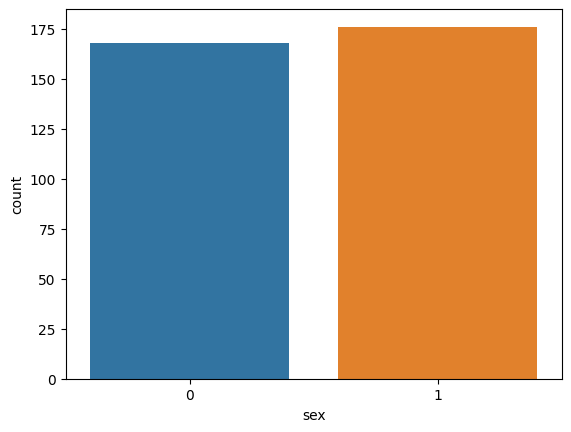

In [150]:
sns.countplot(x = 'sex',data = df1_fill)
plt.show()

In [113]:
sum(df1_fill['sex'].isna())
df1_fill = df1_fill.fillna('female')
sum(df1_fill['sex'].isna())


0

<ipython-input-114-03b28514448e>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df1_drop.corr()


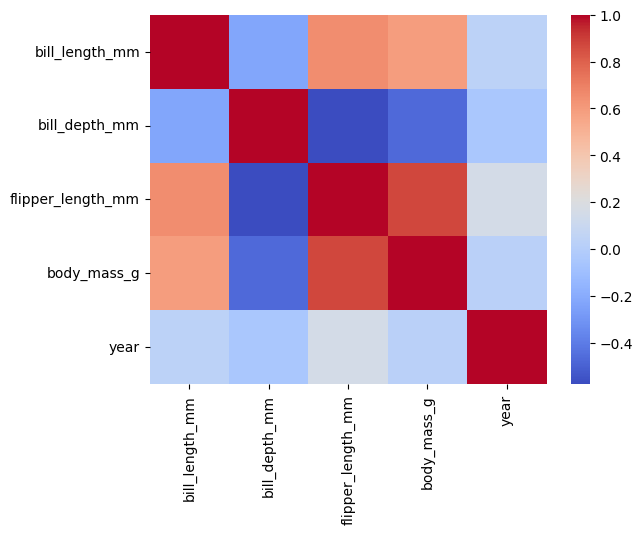

In [114]:
# correlation matrix heatmap
correlation_matrix = df1_drop.corr()
sns.heatmap(correlation_matrix, cmap='coolwarm')
plt.show()

In [127]:
# 범주형 자료 처리 species  island   sex df1_fill
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()

encoded_species = label_encoder.fit_transform(df1_drop['species'])
# df1_drop.loc[df1_drop['species'], 'species'] = encoded_species
df1_drop['species'] = encoded_species
df1_drop.head()

df1_drop.loc[df1_drop['sex'] == 'male', 'sex'] = 0
df1_drop.loc[df1_drop['sex'] == 'female', 'sex'] = 1
df1_drop.head()

<ipython-input-127-61dcabe4b055>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1_drop.loc[df1_drop['species'], 'species'] = encoded_species


,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
0,0,Torgersen,39.1,18.7,181.0,3750.0,0,2007
1,0,Torgersen,39.5,17.4,186.0,3800.0,1,2007
2,0,Torgersen,40.3,18.0,195.0,3250.0,1,2007
4,0,Torgersen,36.7,19.3,193.0,3450.0,1,2007
5,0,Torgersen,39.3,20.6,190.0,3650.0,0,2007


In [130]:
label_encoder = LabelEncoder()
encoded_target = label_encoder.fit_transform(df1_drop['island'])
df1_drop['island'] = encoded_target
df1_drop.head()


<ipython-input-130-4c3e88b93be3>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1_drop['island'] = encoded_target


,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
0,0,2,39.1,18.7,181.0,3750.0,0,2007
1,0,2,39.5,17.4,186.0,3800.0,1,2007
2,0,2,40.3,18.0,195.0,3250.0,1,2007
4,0,2,36.7,19.3,193.0,3450.0,1,2007
5,0,2,39.3,20.6,190.0,3650.0,0,2007


In [134]:
# train test split
x_data = df1_drop.drop('island',axis = 1)
target_data = df1_drop['island']

x_train,x_test,y_train,y_test = train_test_split(x_data,target_data,test_size = 0.2,random_state=42)


# from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


model = RandomForestClassifier()
model.fit(x_train,y_train)
y_pred = model.predict(x_test)

acc = accuracy_score(y_test,y_pred)
print('acc',acc)

# 분류 보고서 출력
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# 혼동 행렬 출력
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))



acc 0.6716417910447762

Classification Report:
              precision    recall  f1-score   support

           0       0.69      0.71      0.70        28
           1       0.69      0.88      0.77        25
           2       0.50      0.21      0.30        14

    accuracy                           0.67        67
   macro avg       0.63      0.60      0.59        67
weighted avg       0.65      0.67      0.64        67


Confusion Matrix:
[[20  6  2]
 [ 2 22  1]
 [ 7  4  3]]


In [135]:
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier()
model.fit(x_train,y_train)
y_pred = model.predict(x_test)

acc = accuracy_score(y_test,y_pred)
print('acc',acc)

# 분류 보고서 출력
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# 혼동 행렬 출력
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))


acc 0.6119402985074627

Classification Report:
              precision    recall  f1-score   support

           0       0.66      0.75      0.70        28
           1       0.62      0.80      0.70        25
           2       0.00      0.00      0.00        14

    accuracy                           0.61        67
   macro avg       0.43      0.52      0.47        67
weighted avg       0.51      0.61      0.55        67


Confusion Matrix:
[[21  6  1]
 [ 3 20  2]
 [ 8  6  0]]


In [136]:
from sklearn.svm import SVC
model = SVC()
model.fit(x_train,y_train)
y_pred = model.predict(x_test)

acc = accuracy_score(y_test,y_pred)
print('acc',acc)

# 분류 보고서 출력
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# 혼동 행렬 출력
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))


acc 0.6417910447761194

Classification Report:
              precision    recall  f1-score   support

           0       0.80      0.71      0.75        28
           1       0.55      0.92      0.69        25
           2       0.00      0.00      0.00        14

    accuracy                           0.64        67
   macro avg       0.45      0.54      0.48        67
weighted avg       0.54      0.64      0.57        67


Confusion Matrix:
[[20  8  0]
 [ 2 23  0]
 [ 3 11  0]]


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [139]:
def model_fitting(my_model,x_data,target_data):
  x_train,x_test,y_train,y_test = train_test_split(x_data,target_data,test_size = 0.2,random_state=42)

  model = my_model()
  model.fit(x_train,y_train)
  y_pred = model.predict(x_test)

  acc = accuracy_score(y_test,y_pred)
  print(str(model),'acc',acc)

  # 분류 보고서 출력
  print("\nstr(model) : Classification Report:")
  print(classification_report(y_test, y_pred))

  # 혼동 행렬 출력
  print("\nstr(model) : Confusion Matrix:")
  print(confusion_matrix(y_test, y_pred))

  return model




In [140]:
svm_model = model_fitting(SVC,x_data,target_data)

SVC() acc 0.6417910447761194

str(model) : Classification Report:
              precision    recall  f1-score   support

           0       0.80      0.71      0.75        28
           1       0.55      0.92      0.69        25
           2       0.00      0.00      0.00        14

    accuracy                           0.64        67
   macro avg       0.45      0.54      0.48        67
weighted avg       0.54      0.64      0.57        67


str(model) : Confusion Matrix:
[[20  8  0]
 [ 2 23  0]
 [ 3 11  0]]


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [141]:
from sklearn.preprocessing import StandardScaler

def model_fitting_scale(my_model,x_data,target_data):
  x_train,x_test,y_train,y_test = train_test_split(x_data,target_data,test_size = 0.2,random_state=42)
  scaler = StandardScaler()
  x_train_s = scaler.fit_transform(x_train)
  x_test_s = scaler.fit_transform(x_test)


  model = my_model()
  model.fit(x_train_s,y_train)
  y_pred = model.predict(x_test_s)

  acc = accuracy_score(y_test,y_pred)
  print(str(model),'acc',acc)

  # 분류 보고서 출력
  print("\nstr(model) : Classification Report:")
  print(classification_report(y_test, y_pred))

  # 혼동 행렬 출력
  print("\nstr(model) : Confusion Matrix:")
  print(confusion_matrix(y_test, y_pred))

  return model




In [142]:
model_fitting_scale(RandomForestClassifier,x_data,target_data)

RandomForestClassifier() acc 0.6865671641791045

str(model) : Classification Report:
              precision    recall  f1-score   support

           0       0.77      0.71      0.74        28
           1       0.63      0.88      0.73        25
           2       0.67      0.29      0.40        14

    accuracy                           0.69        67
   macro avg       0.69      0.63      0.62        67
weighted avg       0.70      0.69      0.67        67


str(model) : Confusion Matrix:
[[20  6  2]
 [ 3 22  0]
 [ 3  7  4]]


RandomForestClassifier()

In [144]:
from sklearn.tree import DecisionTreeClassifier

model_fitting_scale(DecisionTreeClassifier,x_data,target_data)

DecisionTreeClassifier() acc 0.7014925373134329

str(model) : Classification Report:
              precision    recall  f1-score   support

           0       0.71      0.79      0.75        28
           1       0.78      0.84      0.81        25
           2       0.44      0.29      0.35        14

    accuracy                           0.70        67
   macro avg       0.64      0.64      0.63        67
weighted avg       0.68      0.70      0.69        67


str(model) : Confusion Matrix:
[[22  1  5]
 [ 4 21  0]
 [ 5  5  4]]


DecisionTreeClassifier()

In [145]:
# 범주형 자료 처리 species  island   sex df1_fill
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()

encoded_species = label_encoder.fit_transform(df1_fill['species'])
# df1_drop.loc[df1_drop['species'], 'species'] = encoded_species
df1_fill['species'] = encoded_species
df1_fill.head()

df1_fill.loc[df1_fill['sex'] == 'male', 'sex'] = 0
df1_fill.loc[df1_fill['sex'] == 'female', 'sex'] = 1
df1_fill.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
0,0,Torgersen,39.10000,18.70000,181.000000,3750.000000,0,2007
1,0,Torgersen,39.50000,17.40000,186.000000,3800.000000,1,2007
2,0,Torgersen,40.30000,18.00000,195.000000,3250.000000,1,2007
3,0,Torgersen,43.92193,17.15117,200.915205,4201.754386,1,2007
4,0,Torgersen,36.70000,19.30000,193.000000,3450.000000,1,2007


In [146]:
label_encoder = LabelEncoder()
encoded_target = label_encoder.fit_transform(df1_fill['island'])
df1_fill['island'] = encoded_target
df1_fill.head()


,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
0,0,2,39.10000,18.70000,181.000000,3750.000000,0,2007
1,0,2,39.50000,17.40000,186.000000,3800.000000,1,2007
2,0,2,40.30000,18.00000,195.000000,3250.000000,1,2007
3,0,2,43.92193,17.15117,200.915205,4201.754386,1,2007
4,0,2,36.70000,19.30000,193.000000,3450.000000,1,2007


In [147]:
x_data = df1_fill.drop('island',axis = 1)
target_data = df1_fill['island']

In [148]:
model_fitting_scale(DecisionTreeClassifier,x_data,target_data)

DecisionTreeClassifier() acc 0.6956521739130435

str(model) : Classification Report:
              precision    recall  f1-score   support

           0       0.78      0.85      0.82        34
           1       0.67      0.82      0.73        22
           2       0.20      0.08      0.11        13

    accuracy                           0.70        69
   macro avg       0.55      0.58      0.55        69
weighted avg       0.64      0.70      0.66        69


str(model) : Confusion Matrix:
[[29  3  2]
 [ 2 18  2]
 [ 6  6  1]]


DecisionTreeClassifier()

## KNN

In [5]:
df_org = pd.read_csv('./diabetes.csv')
print(df_org.info())
print(df_org.describe())
df_org.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB
None
       Pregnancies     Glucose  BloodPressure  SkinThickness     Insulin  \
count   768.000000  768.000000     768.000000     768.000000  768.000000   
mean      3.845052  120.894531      69.105469      20.536458   79.799479   
std    

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


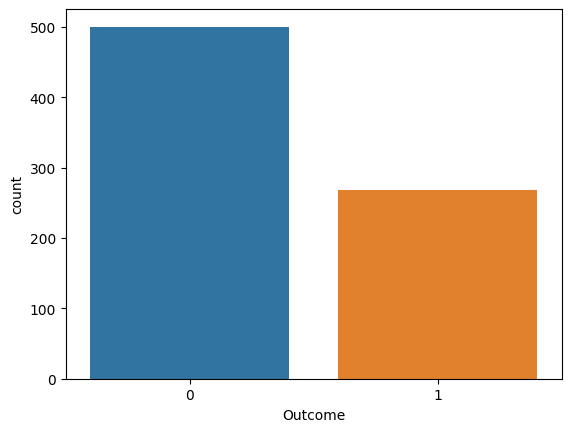

In [6]:
sns.countplot(x = 'Outcome',data = df_org)
plt.show()

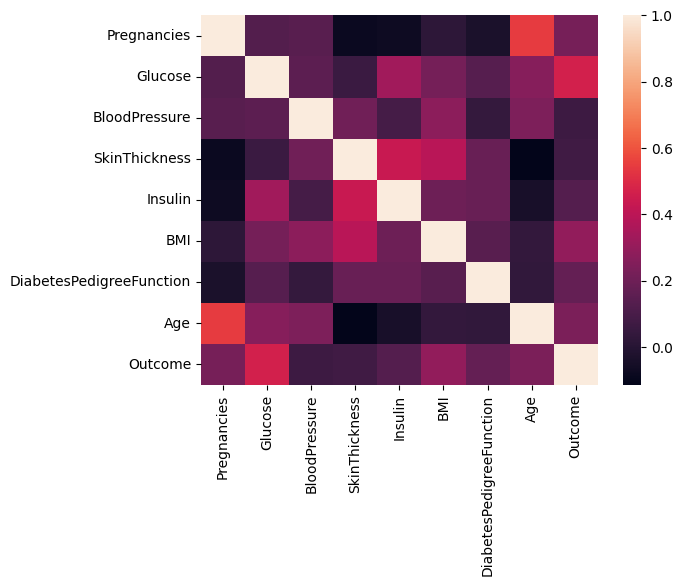

In [7]:
correation_matrix = df_org.corr()
sns.heatmap(correation_matrix)
plt.show()

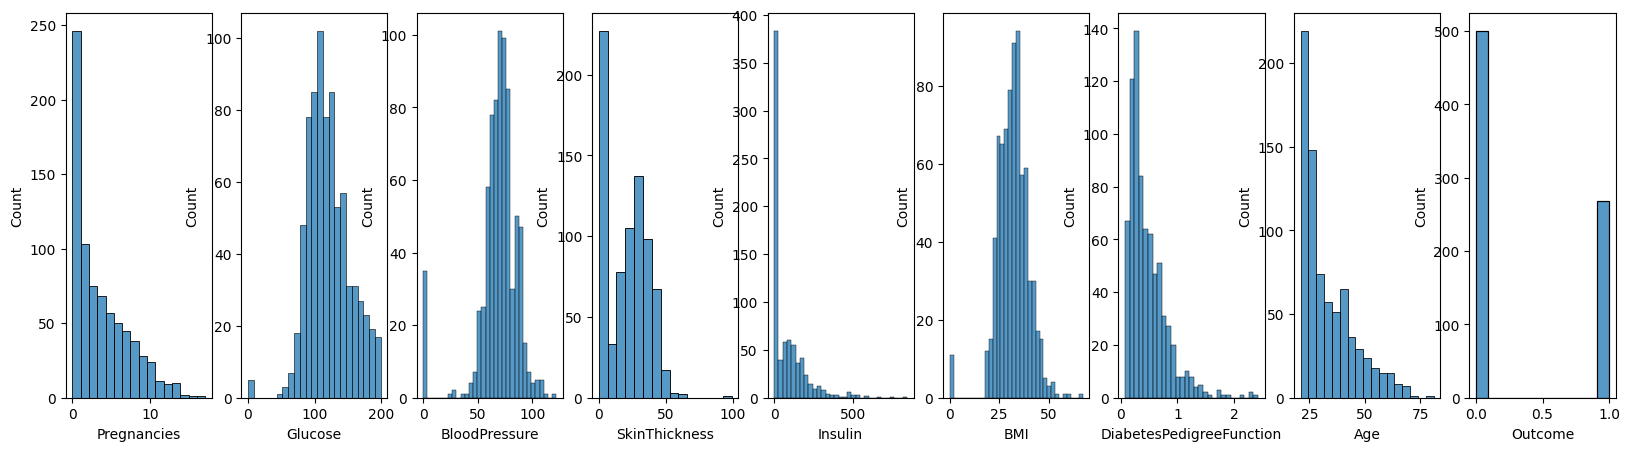

In [8]:
def visualize_feature_dist(dataframe):
    num_feature = len(dataframe.columns)
    fig, axes = plt.subplots(1, num_feature, figsize=(20, 5))  # figsize는 그림의 크기를 조절하는 부분입니다.

    for i, col in enumerate(dataframe.columns):
        sns.histplot(x=col, data=dataframe, ax=axes[i])  # 여기서 axes[i]로 수정

    plt.show()



visualize_feature_dist(df_org)
# 정규화 진행 필요해 보인다.

In [9]:
target_data = df_org['Outcome']
features = df_org.drop('Outcome',axis=1)

# 다양한 ML 모델을 실행하는 함수
- 로지스틱 회귀 (Logistic Regression):
- 결정 트리 (Decision Tree):
- 랜덤 포레스트 (Random Forest):
- 서포트 벡터 머신 (Support Vector Machine, SVM):
- K 최근접 이웃 (K-Nearest Neighbors, KNN):

In [10]:
# 로지스틱 회귀 (Logistic Regression):
# 결정 트리 (Decision Tree):
# 랜덤 포레스트 (Random Forest):
# 서포트 벡터 머신 (Support Vector Machine, SVM):
# K 최근접 이웃 (K-Nearest Neighbors, KNN):
#


def multiple_model_fitting(x_data,target_data,minmax = False):
  from sklearn.linear_model import LogisticRegression
  from sklearn.tree import DecisionTreeClassifier
  from sklearn.ensemble import RandomForestClassifier
  from sklearn.svm import SVC
  from sklearn.neighbors import KNeighborsClassifier
  from sklearn.preprocessing import MinMaxScaler
  from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


  scaler = MinMaxScaler()
  logistic_model = LogisticRegression()
  decision_model = DecisionTreeClassifier()
  random_forest_model = RandomForestClassifier()
  svc_model = SVC()
  KNN_model = KNeighborsClassifier()

  models = [logistic_model,decision_model,random_forest_model,svc_model,KNN_model]
  fitted_model = []
  acc_dict = dict()

  x_train,x_test,y_train,y_test = train_test_split(x_data,target_data,test_size = 0.2,random_state=42)

  if minmax:
    x_train = scaler.fit_transform(x_train)
    x_test = scaler.fit_transform(x_test)

  for model in models:
      model.fit(x_train,y_train)
      y_pred = model.predict(x_test)
      acc = accuracy_score(y_test,y_pred)
      acc_dict[str(model)] = acc
      print('#'*30)
      print(str(model)+'Acc : ',acc)
      print(classification_report(y_test, y_pred))
      fitted_model.append(model)

  return fitted_model


In [168]:
trained_model = multiple_model_fitting(features,target_data)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


##########
LogisticRegression()Acc :  0.7467532467532467
              precision    recall  f1-score   support

           0       0.81      0.79      0.80        99
           1       0.64      0.67      0.65        55

    accuracy                           0.75       154
   macro avg       0.73      0.73      0.73       154
weighted avg       0.75      0.75      0.75       154

##########
DecisionTreeClassifier()Acc :  0.7402597402597403
              precision    recall  f1-score   support

           0       0.82      0.77      0.79        99
           1       0.62      0.69      0.66        55

    accuracy                           0.74       154
   macro avg       0.72      0.73      0.72       154
weighted avg       0.75      0.74      0.74       154

##########
RandomForestClassifier()Acc :  0.7467532467532467
              precision    recall  f1-score   support

           0       0.79      0.82      0.81        99
           1       0.65      0.62      0.64        55

   

In [176]:
trained_model_scaled = multiple_model_fitting(features,target_data,minmax=True)

##############################
LogisticRegression()Acc :  0.7597402597402597
              precision    recall  f1-score   support

           0       0.80      0.83      0.82        99
           1       0.67      0.64      0.65        55

    accuracy                           0.76       154
   macro avg       0.74      0.73      0.74       154
weighted avg       0.76      0.76      0.76       154

##############################
DecisionTreeClassifier()Acc :  0.7012987012987013
              precision    recall  f1-score   support

           0       0.73      0.85      0.79        99
           1       0.62      0.44      0.51        55

    accuracy                           0.70       154
   macro avg       0.67      0.64      0.65       154
weighted avg       0.69      0.70      0.69       154

##############################
RandomForestClassifier()Acc :  0.7662337662337663
              precision    recall  f1-score   support

           0       0.78      0.88      0.83        9

# Neural Network 사용

In [11]:
import torch
import torch.nn as nn
import torch.optim as optim

class MLP(nn.Module):
  def __init__(self,input_size,hidden_size,output_size):
    super(MLP,self).__init__()
    self.fc1 = nn.Linear(input_size,hidden_size)
    self.relu = nn.ReLU()
    self.fc2 = nn.Linear(hidden_size,hidden_size*2)
    self.fc3 = nn.Linear(2*hidden_size,hidden_size)
    self.fc4 = nn.Linear(hidden_size,output_size)
    self.softmax = nn.Softmax(dim=1)

  def forward(self,x):
    x = self.fc1(x)
    x = self.relu(x)
    x = self.fc2(x)
    x = self.relu(x)
    x = self.fc3(x)
    x = self.relu(x)
    x = self.fc4(x)
    x = self.softmax(x)
    return x



In [183]:
input_size = len(features.columns)
hidden_size = 30
output_size = 2

NN_model = MLP(input_size,hidden_size,output_size)


# 손실 함수 및 최적화 알고리즘 정의
criterion = nn.CrossEntropyLoss()  # 다중 클래스 분류를 위한 CrossEntropyLoss
optimizer = optim.SGD(NN_model.parameters(), lr=0.01)

epochs = 100


for epoch in range(epochs):
    # 입력 데이터 및 정답 데이터 생성 (예시)
    inputs = torch.tensor(features.values,dtype = torch.float32)  # 64개의 샘플
    labels = torch.tensor(target_data)
    # 그래디언트 초기화
    optimizer.zero_grad()

    # 순전파 (Forward pass)
    outputs = NN_model(inputs)

    # 손실 계산
    loss = criterion(outputs, labels)

    # 역전파 (Backward pass)
    loss.backward()

    # 매개변수 업데이트
    optimizer.step()

    # 로그 출력
    if (epoch + 1) % 10 == 0:
        print(f'Epoch [{epoch+1}/{epochs}], Loss: {loss.item():.4f}')


Epoch [10/100], Loss: 0.6657
Epoch [20/100], Loss: 0.6647
Epoch [30/100], Loss: 0.6641
Epoch [40/100], Loss: 0.6638
Epoch [50/100], Loss: 0.6636
Epoch [60/100], Loss: 0.6634
Epoch [70/100], Loss: 0.6633
Epoch [80/100], Loss: 0.6632
Epoch [90/100], Loss: 0.6631
Epoch [100/100], Loss: 0.6630


In [20]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import pandas as pd
import numpy as np

# 임의의 테이블 데이터 생성
np.random.seed(42)


df = df_org

# 데이터 분할 (훈련 데이터와 테스트 데이터)
train_df, test_df = train_test_split(df, test_size=0.2, random_state=42)

# 데이터 전처리
X_train = torch.tensor(train_df.drop('Outcome', axis=1).values, dtype=torch.float32)
y_train = torch.tensor(train_df['Outcome'].values, dtype=torch.long)

X_test = torch.tensor(test_df.drop('Outcome', axis=1).values, dtype=torch.float32)
y_test = torch.tensor(test_df['Outcome'].values, dtype=torch.long)

# 데이터로더 생성
train_dataset = TensorDataset(X_train, y_train)
test_dataset = TensorDataset(X_test, y_test)

batch_size = 8
train_loader = DataLoader(dataset=train_dataset, batch_size=batch_size, shuffle=True)
test_loader = DataLoader(dataset=test_dataset, batch_size=batch_size, shuffle=False)


# 모델 및 손실 함수, 최적화 알고리즘 정의
input_size = len(df.columns) - 1  # 특성의 개수
hidden_size = 64
output_size = 2  # 이진 분류의 경우 출력 크기는 2
learning_rate = 0.0000001
epochs = 100

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

model = MLP(input_size, hidden_size, output_size).to(device)
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=learning_rate)

# 훈련 루프
for epoch in range(epochs):
    model.train()
    total_loss = 0.0
    predictions = []
    labels = []

    for inputs, targets in train_loader:
        inputs, targets = inputs.to(device), targets.to(device)

        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, targets)
        total_loss += loss.item()

        loss.backward()
        optimizer.step()

        _, predicted = torch.max(outputs, 1)
        predictions.extend(predicted.cpu().numpy())
        labels.extend(targets.cpu().numpy())

    accuracy = accuracy_score(labels, predictions)
    print(f'Epoch [{epoch+1}/{epochs}], Loss: {total_loss:.4f}, Accuracy: {accuracy:.4f}')

# 테스트 데이터에 대한 정확도 계산
model.eval()
test_predictions = []
test_labels = []

for inputs, targets in test_loader:
    inputs, targets = inputs.to(device), targets.to(device)
    test_outputs = model(inputs)
    _, predicted = torch.max(test_outputs, 1)
    test_predictions.extend(predicted.cpu().numpy())
    test_labels.extend(targets.cpu().numpy())

test_accuracy = accuracy_score(test_labels, test_predictions)
print(f'Test Accuracy: {test_accuracy:.4f}')


Epoch [1/100], Loss: 51.5512, Accuracy: 0.6482
Epoch [2/100], Loss: 51.5849, Accuracy: 0.6482
Epoch [3/100], Loss: 51.5395, Accuracy: 0.6482
Epoch [4/100], Loss: 51.5218, Accuracy: 0.6482
Epoch [5/100], Loss: 51.5635, Accuracy: 0.6482
Epoch [6/100], Loss: 51.5741, Accuracy: 0.6482
Epoch [7/100], Loss: 51.5395, Accuracy: 0.6482
Epoch [8/100], Loss: 51.5484, Accuracy: 0.6482
Epoch [9/100], Loss: 51.5744, Accuracy: 0.6482
Epoch [10/100], Loss: 51.4951, Accuracy: 0.6482
Epoch [11/100], Loss: 51.4847, Accuracy: 0.6482
Epoch [12/100], Loss: 51.5067, Accuracy: 0.6482
Epoch [13/100], Loss: 51.4958, Accuracy: 0.6482
Epoch [14/100], Loss: 51.4377, Accuracy: 0.6482
Epoch [15/100], Loss: 51.4207, Accuracy: 0.6482
Epoch [16/100], Loss: 51.5262, Accuracy: 0.6482
Epoch [17/100], Loss: 51.5834, Accuracy: 0.6482
Epoch [18/100], Loss: 51.5625, Accuracy: 0.6482
Epoch [19/100], Loss: 51.4419, Accuracy: 0.6482
Epoch [20/100], Loss: 51.4789, Accuracy: 0.6482
Epoch [21/100], Loss: 51.5604, Accuracy: 0.6482
E

In [40]:
# 모델 만들기

from tensorflow import keras
from tensorflow.keras import layers
import pandas as pd
import tensorflow as tf
# 테스트 데이터 분리

from sklearn.model_selection import train_test_split
# 레이블 데이터 'Outcome'추출
# 특성과 레이블 분리

df_org = pd.read_csv('./diabetes.csv')
print(df_org.info())
print(df_org.describe())
df_org.head()



X_data = df_org.drop(['Outcome'], axis=1)
X_data.head()

y_data = df_org['Outcome']
y_data.head()


X_train, X_test, y_train, y_test = train_test_split(X_data, y_data, test_size=0.2, random_state=42)

print(X_train.shape, X_test.shape)
print(y_train.shape, y_test.shape)
# 넘파이 배열로 타입 변경- 이상치 확인

y_train = y_train.values
y_test=y_test.values

print(type(y_train), type(y_test))


def build_model():
  model = keras.Sequential()
  model.add(layers.Dense(12,input_dim=8, activation='sigmoid'))
  model.add(layers.Dense(8, activation='sigmoid'))
  model.add(layers.Dense(1, activation='sigmoid'))
  return model

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB
None
       Pregnancies     Glucose  BloodPressure  SkinThickness     Insulin  \
count   768.000000  768.000000     768.000000     768.000000  768.000000   
mean      3.845052  120.894531      69.105469      20.536458   79.799479   
std    

In [41]:
model = build_model()
model.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_17 (Dense)            (None, 12)                108       
                                                                 
 dense_18 (Dense)            (None, 8)                 104       
                                                                 
 dense_19 (Dense)            (None, 1)                 9         
                                                                 
Total params: 221 (884.00 Byte)
Trainable params: 221 (884.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [42]:
# 모델의 컴파일-binary_crossentropy
model.compile(loss='binary_crossentropy', optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001), metrics=['acc'])

In [43]:
# 모델 학습
history = model.fit(X_train, y_train, epochs=500, batch_size=8, validation_split=0.2,verbose=1,)

Epoch 1/500
62/62 [==============================] - 1s 6ms/step - loss: 0.6522 - acc: 0.6640 - val_loss: 0.6844 - val_acc: 0.6098
Epoch 2/500
62/62 [==============================] - 0s 3ms/step - loss: 0.6509 - acc: 0.6640 - val_loss: 0.6841 - val_acc: 0.6098
Epoch 3/500
62/62 [==============================] - 0s 3ms/step - loss: 0.6499 - acc: 0.6640 - val_loss: 0.6837 - val_acc: 0.6098
Epoch 4/500
62/62 [==============================] - 0s 3ms/step - loss: 0.6490 - acc: 0.6640 - val_loss: 0.6834 - val_acc: 0.6098
Epoch 5/500
62/62 [==============================] - 0s 3ms/step - loss: 0.6481 - acc: 0.6640 - val_loss: 0.6833 - val_acc: 0.6098
Epoch 6/500
62/62 [==============================] - 0s 3ms/step - loss: 0.6473 - acc: 0.6640 - val_loss: 0.6831 - val_acc: 0.6098
Epoch 7/500
62/62 [==============================] - 0s 3ms/step - loss: 0.6467 - acc: 0.6640 - val_loss: 0.6829 - val_acc: 0.6098
Epoch 8/500
62/62 [==============================] - 0s 3ms/step - loss: 0.6460 - a

KeyboardInterrupt: ignored

In [23]:
# 학습곡선 그리기

import matplotlib.pyplot as plt

def plot_history(history):
  hist=pd.DataFrame(history.history)
  hist['epoch']=history.epoch

  plt.figure(figsize=(16,8))
  plt.subplot(1,2,1)
  plt.xlabel('Epoch')
  plt.ylabel('Loss')
  plt.plot(hist['epoch'],hist['loss'],label='Train Loss')
  plt.plot(hist['epoch'], hist['val_loss'],label='Val Loss')

  plt.subplot(1,2,1)
  plt.xlabel('Epoch')
  plt.ylabel('Accuracy')
  plt.plot(hist['epoch'],hist['acc'],label='Train Accuracy')
  plt.plot(hist['epoch'], hist['val_acc'],label='Val Accuracy')
  plt.legend()

  plt.show()


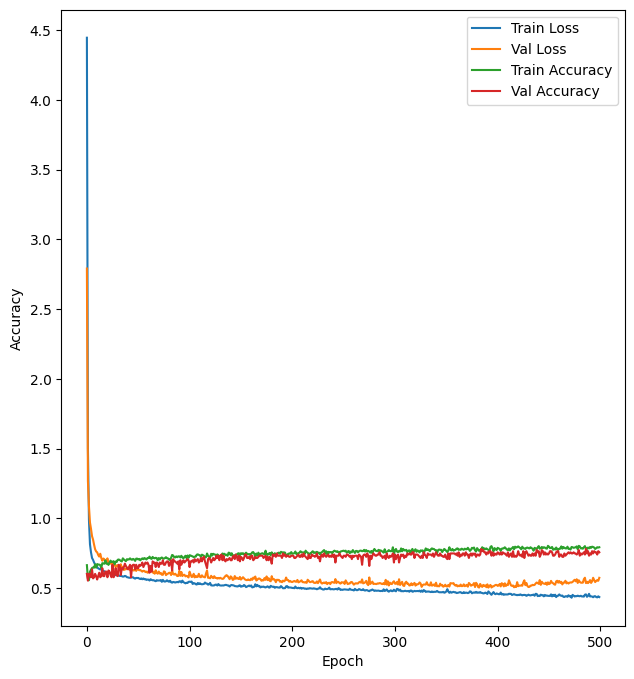

In [24]:
plot_history(history)

In [25]:
import matplotlib.pyplot as plt

def plot_history(history):
  hist = pd.DataFrame(history.history)
  hist['epoch'] = history.epoch

  plt.figure(figsize=(16,8))
  plt.subplot(1,2,1)
  plt.xlabel('Epoch')
  plt.ylabel('Loss')
  plt.plot(hist['epoch'], hist['loss'], label='Train Loss')
  plt.plot(hist['epoch'], hist['val_loss'], label='Val Loss')
  plt.legend()

  plt.subplot(1,2,2)
  plt.xlabel('Epoch')
  plt.ylabel('Accuracy')
  plt.plot(hist['epoch'], hist['acc'], label='Train Accuracy')
  plt.plot(hist['epoch'], hist['val_acc'], label='Val Accuracy')
  plt.legend()

  plt.show()

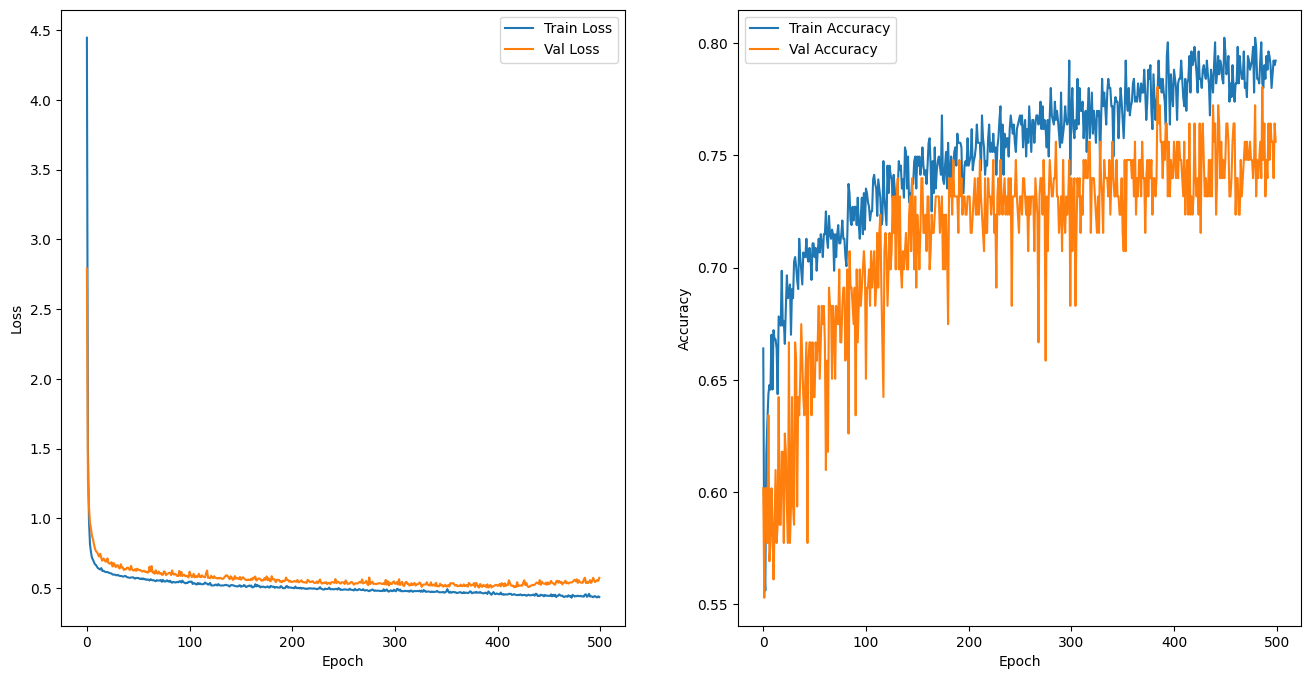

In [26]:
plot_history(history)

In [44]:
df = pd.read_csv('./air_quality_no2_long.csv')
df.head()

,city,country,date.utc,location,parameter,value,unit
0,Paris,FR,2019-06-21 00:00:00+00:00,FR04014,no2,20.0,microgram per m^3
1,Paris,FR,2019-06-20 23:00:00+00:00,FR04014,no2,21.8,microgram per m^3
2,Paris,FR,2019-06-20 22:00:00+00:00,FR04014,no2,26.5,microgram per m^3
3,Paris,FR,2019-06-20 21:00:00+00:00,FR04014,no2,24.9,microgram per m^3
4,Paris,FR,2019-06-20 20:00:00+00:00,FR04014,no2,21.4,microgram per m^3


In [45]:
df.info() # unit 필요 없고 , parameter 필요 없고  컨트리랑 데이트 value

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2068 entries, 0 to 2067
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   city       2068 non-null   object 
 1   country    2068 non-null   object 
 2   date.utc   2068 non-null   object 
 3   location   2068 non-null   object 
 4   parameter  2068 non-null   object 
 5   value      2068 non-null   float64
 6   unit       2068 non-null   object 
dtypes: float64(1), object(6)
memory usage: 113.2+ KB


In [47]:
set(df['country'])

{'BE', 'FR', 'GB'}

In [48]:
set(df['city'])

{'Antwerpen', 'London', 'Paris'}

In [49]:
set(df['parameter'])

{'no2'}

In [50]:
set(df['location'])

{'BETR801', 'FR04014', 'London Westminster'}

In [51]:
set(df['unit'])

{'microgram per m^3'}

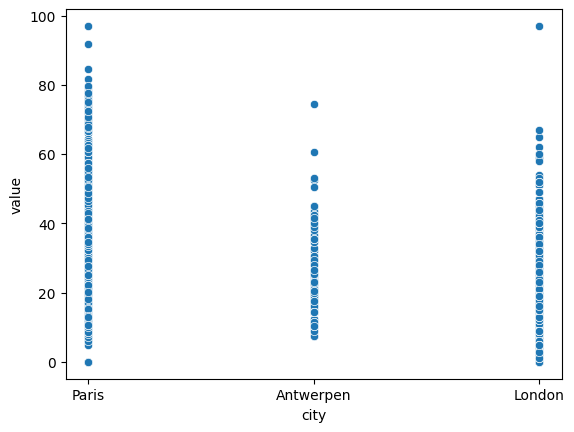

In [55]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.scatterplot(y = df['value'],x = df['city'])
plt.show()

In [57]:
df_pre = df.drop(['country','parameter','unit','location'],axis=1)
df_pre.head()

,city,date.utc,value
0,Paris,2019-06-21 00:00:00+00:00,20.0
1,Paris,2019-06-20 23:00:00+00:00,21.8
2,Paris,2019-06-20 22:00:00+00:00,26.5
3,Paris,2019-06-20 21:00:00+00:00,24.9
4,Paris,2019-06-20 20:00:00+00:00,21.4


In [61]:
date_time = pd.to_datetime(df_pre['date.utc'])
df_pre['date.utc'] = date_time

In [62]:
df_pre.head()

,city,date.utc,value
0,Paris,2019-06-21 00:00:00+00:00,20.0
1,Paris,2019-06-20 23:00:00+00:00,21.8
2,Paris,2019-06-20 22:00:00+00:00,26.5
3,Paris,2019-06-20 21:00:00+00:00,24.9
4,Paris,2019-06-20 20:00:00+00:00,21.4


In [98]:
df_new = df_pre.copy(deep = True)
df_new = df_new.drop('date.utc',axis=1)
df_new.head()

,city,value
0,Paris,20.0
1,Paris,21.8
2,Paris,26.5
3,Paris,24.9
4,Paris,21.4


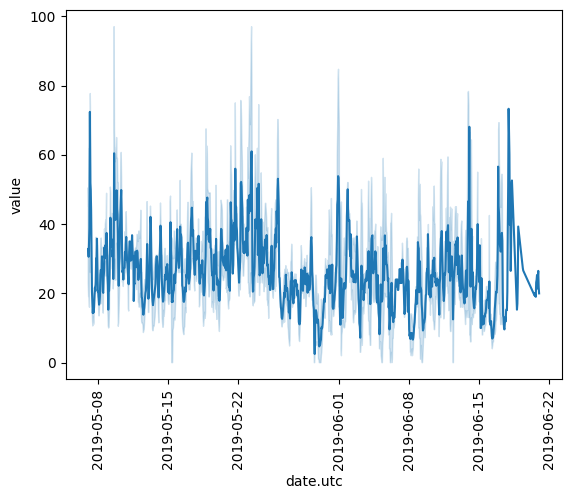

In [72]:
# df_new['year'] = df_pre['date.utc'].year
# df_pre['date.utc'].year
sns.lineplot(x = 'date.utc',y='value', data = df_pre)
plt.xticks(rotation = 90)
plt.show()

In [99]:
df_new['year'] = df_pre['date.utc'].dt.year
df_new['month'] = df_pre['date.utc'].dt.month
df_new['day'] = df_pre['date.utc'].dt.day
df_new['hour'] = df_pre['date.utc'].dt.hour

df_new.head()



,city,value,year,month,day,hour
0,Paris,20.0,2019,6,21,0
1,Paris,21.8,2019,6,20,23
2,Paris,26.5,2019,6,20,22
3,Paris,24.9,2019,6,20,21
4,Paris,21.4,2019,6,20,20


In [100]:
#city labeling
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
encoded_species = label_encoder.fit_transform(df_new['city'])
df_new['city'] = encoded_species
df_new.head()


,city,value,year,month,day,hour
0,2,20.0,2019,6,21,0
1,2,21.8,2019,6,20,23
2,2,26.5,2019,6,20,22
3,2,24.9,2019,6,20,21
4,2,21.4,2019,6,20,20


In [126]:
x_data = df_new.drop('value',axis = 1)
target_data = df_new['value']


In [127]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, r2_score

def multiple_regression_model_fitting(x_data, target_data, minmax=False):
    scaler = MinMaxScaler()
    linear_model = LinearRegression()
    decision_model = DecisionTreeRegressor()
    random_forest_model = RandomForestRegressor()
    svr_model = SVR()
    knn_model = KNeighborsRegressor()

    models = [linear_model, decision_model, random_forest_model, svr_model, knn_model]
    fitted_models = []
    performance_dict = dict()

    x_train, x_test, y_train, y_test = train_test_split(x_data, target_data, test_size=0.2, random_state=42)

    if minmax:
        x_train = scaler.fit_transform(x_train)
        x_test = scaler.fit_transform(x_test)

    for model in models:
        model.fit(x_train, y_train)
        y_pred = model.predict(x_test)

        mse = mean_squared_error(y_test, y_pred)
        r2 = r2_score(y_test, y_pred)

        performance_dict[str(model)] = {'MSE': mse, 'R^2': r2}

        print('#' * 30)
        print(str(model) + ' MSE: ', mse)
        print(str(model) + ' R^2: ', r2)

        fitted_models.append(model)

    return fitted_models, performance_dict

# 예제 사용법
# fitted_models, performance_dict = multiple_regression_model_fitting(x_data, target_data, minmax=True)


In [128]:
fitted_models, performance_dict = multiple_regression_model_fitting(x_data, target_data, minmax=False)

##############################
LinearRegression() MSE:  205.91440210166033
LinearRegression() R^2:  -0.006969859766604136
##############################
DecisionTreeRegressor() MSE:  76.93864734299517
DecisionTreeRegressor() R^2:  0.6237519176178917
##############################
RandomForestRegressor() MSE:  55.4872632560386
RandomForestRegressor() R^2:  0.728654231420973
##############################
SVR() MSE:  214.57223792539918
SVR() R^2:  -0.04930871336951248
##############################
KNeighborsRegressor() MSE:  142.68677198067633
KNeighborsRegressor() R^2:  0.3022281234073402


In [131]:
fitted_models_s, performance_dict_s = multiple_regression_model_fitting(x_data, target_data, minmax=True)

##############################
LinearRegression() MSE:  205.9144021016604
LinearRegression() R^2:  -0.00696985976660458
##############################
DecisionTreeRegressor() MSE:  77.99205314009662
DecisionTreeRegressor() R^2:  0.6186005154966312
##############################
RandomForestRegressor() MSE:  59.522460814009634
RandomForestRegressor() R^2:  0.7089211662365642
##############################
SVR() MSE:  212.8675101067075
SVR() R^2:  -0.04097219336407498
##############################
KNeighborsRegressor() MSE:  137.2735420289855
KNeighborsRegressor() R^2:  0.32870009112646703


In [132]:
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
import pandas as pd



df = df_new

# 피처와 타겟 분리
x_data = x_data
y_data = target_data

# 데이터 정규화
scaler = MinMaxScaler()
x_data_scaled = scaler.fit_transform(x_data)

# 훈련 데이터와 테스트 데이터 분리
x_train, x_test, y_train, y_test = train_test_split(x_data_scaled, y_data, test_size=0.2, random_state=42)


In [138]:

def build_model():
  model = keras.Sequential()
  model.add(layers.Dense(32,input_shape=(x_train.shape[1],), activation='relu'))
  model.add(layers.Dense(64, activation='relu'))
  model.add(layers.Dense(32, activation='relu'))
  model.add(layers.Dense(1))
  return model


model = build_model()
model.summary()

Model: "sequential_15"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_37 (Dense)            (None, 32)                192       
                                                                 
 dense_38 (Dense)            (None, 64)                2112      
                                                                 
 dense_39 (Dense)            (None, 32)                2080      
                                                                 
 dense_40 (Dense)            (None, 1)                 33        
                                                                 
Total params: 4417 (17.25 KB)
Trainable params: 4417 (17.25 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [139]:
# 모델의 컴파일-binary_crossentropy

model.compile(optimizer='adam', loss='mean_squared_error')


In [140]:
# 모델 학습
# history = model.fit(x_train, y_train, epochs=100, verbose=2, validation_split=0.2)

history = model.fit(x_train, y_train, epochs=500, batch_size=16, validation_split=0.2,verbose=1)

Epoch 1/500
83/83 [==============================] - 1s 5ms/step - loss: 664.8991 - val_loss: 213.0609
Epoch 2/500
83/83 [==============================] - 0s 3ms/step - loss: 197.5285 - val_loss: 161.6423
Epoch 3/500
83/83 [==============================] - 0s 3ms/step - loss: 185.9825 - val_loss: 159.2922
Epoch 4/500
83/83 [==============================] - 0s 3ms/step - loss: 181.6512 - val_loss: 157.5509
Epoch 5/500
83/83 [==============================] - 0s 4ms/step - loss: 180.0013 - val_loss: 157.1129
Epoch 6/500
83/83 [==============================] - 0s 4ms/step - loss: 175.9314 - val_loss: 158.0524
Epoch 7/500
83/83 [==============================] - 0s 4ms/step - loss: 174.1596 - val_loss: 152.4470
Epoch 8/500
83/83 [==============================] - 0s 4ms/step - loss: 171.7381 - val_loss: 151.7834
Epoch 9/500
83/83 [==============================] - 0s 4ms/step - loss: 170.3159 - val_loss: 149.3085
Epoch 10/500
83/83 [==============================] - 0s 4ms/step - loss:

In [141]:
import matplotlib.pyplot as plt

def plot_history(history):
  hist = pd.DataFrame(history.history)
  hist['epoch'] = history.epoch

  plt.figure(figsize=(16,8))
  plt.xlabel('Epoch')
  plt.ylabel('Loss')
  plt.plot(hist['epoch'], hist['loss'], label='Train Loss')
  plt.plot(hist['epoch'], hist['val_loss'], label='Val Loss')
  plt.legend()


  plt.show()

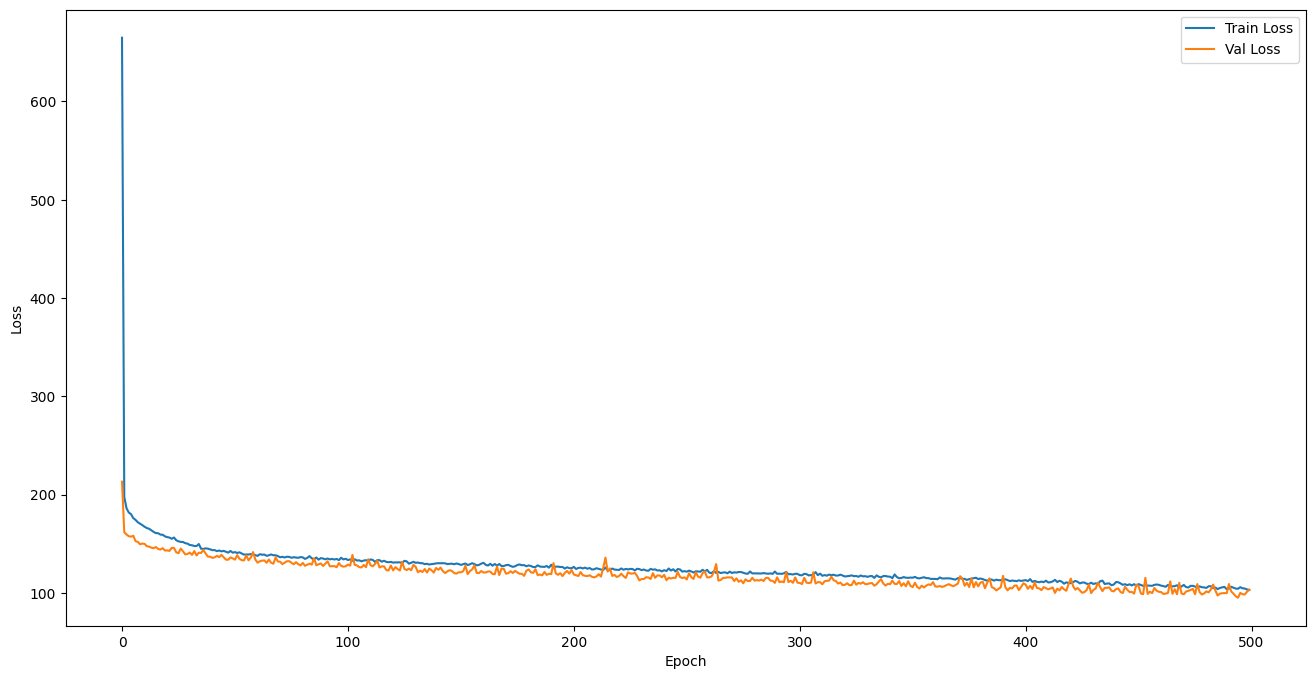

In [142]:
plot_history(history)

### 스팸이다 아니다 분류 acc 확인 및 다른 타겟으로 분석


In [147]:
df = pd.read_csv('./spam.csv', encoding='ISO-8859-1')
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [148]:
df_v = df.drop(['Unnamed: 2','Unnamed: 3','Unnamed: 4'],axis=1)
df_v.head()

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [153]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report

# Load your dataset
df = pd.read_csv('./spam.csv', encoding='ISO-8859-1')  # Update the file path and encoding
#city labeling
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
encoded_species = label_encoder.fit_transform(df['v1'])
df['v1'] = encoded_species
df.head()

# Assuming your dataset has 'text' column for messages and 'label' column for spam or not
X = df['v2']
y = df['v1']

# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Vectorize the text data
vectorizer = CountVectorizer()
X_train = vectorizer.fit_transform(X_train)
X_test = vectorizer.transform(X_test)

# Train a Naive Bayes classifier
nb_classifier = MultinomialNB()
nb_classifier.fit(X_train, y_train)

# Predictions
y_pred = nb_classifier.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy}")
print("Classification Report:\n", report)




Accuracy: 0.9838565022421525
Classification Report:
               precision    recall  f1-score   support

           0       0.98      1.00      0.99       965
           1       0.99      0.89      0.94       150

    accuracy                           0.98      1115
   macro avg       0.98      0.95      0.96      1115
weighted avg       0.98      0.98      0.98      1115



In [155]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer

# Assuming your dataset has 'text' column for messages and 'label' column for spam or not
X = df['v2']
y = df['v1']

# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Vectorize the text data
vectorizer = CountVectorizer()
X_train = vectorizer.fit_transform(X_train)
X_test = vectorizer.transform(X_test)

# Build the TensorFlow model
model = Sequential([
    Dense(128, activation='relu', input_shape=(X_train.shape[1],)),
    Dense(1, activation='sigmoid')
])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(X_train.toarray(), y_train, epochs=100, batch_size=32, validation_split=0.2)

# Evaluate the model on test set
results = model.evaluate(X_test.toarray(), y_test)
print(f"Validation Accuracy: {results[1]:.4f}")
print(f"Validation Loss: {results[0]:.4f}")


Epoch 1/100
112/112 [==============================] - 7s 38ms/step - loss: 0.2748 - accuracy: 0.9321 - val_loss: 0.0933 - val_accuracy: 0.9809
Epoch 2/100
112/112 [==============================] - 3s 28ms/step - loss: 0.0439 - accuracy: 0.9935 - val_loss: 0.0613 - val_accuracy: 0.9854
Epoch 3/100
112/112 [==============================] - 3s 29ms/step - loss: 0.0137 - accuracy: 0.9989 - val_loss: 0.0610 - val_accuracy: 0.9832
Epoch 4/100
112/112 [==============================] - 2s 21ms/step - loss: 0.0060 - accuracy: 0.9997 - val_loss: 0.0662 - val_accuracy: 0.9832
Epoch 5/100
112/112 [==============================] - 3s 24ms/step - loss: 0.0034 - accuracy: 1.0000 - val_loss: 0.0701 - val_accuracy: 0.9832
Epoch 6/100
112/112 [==============================] - 2s 15ms/step - loss: 0.0022 - accuracy: 1.0000 - val_loss: 0.0707 - val_accuracy: 0.9843
Epoch 7/100
112/112 [==============================] - 2s 15ms/step - loss: 0.0015 - accuracy: 1.0000 - val_loss: 0.0741 - val_accuracy:

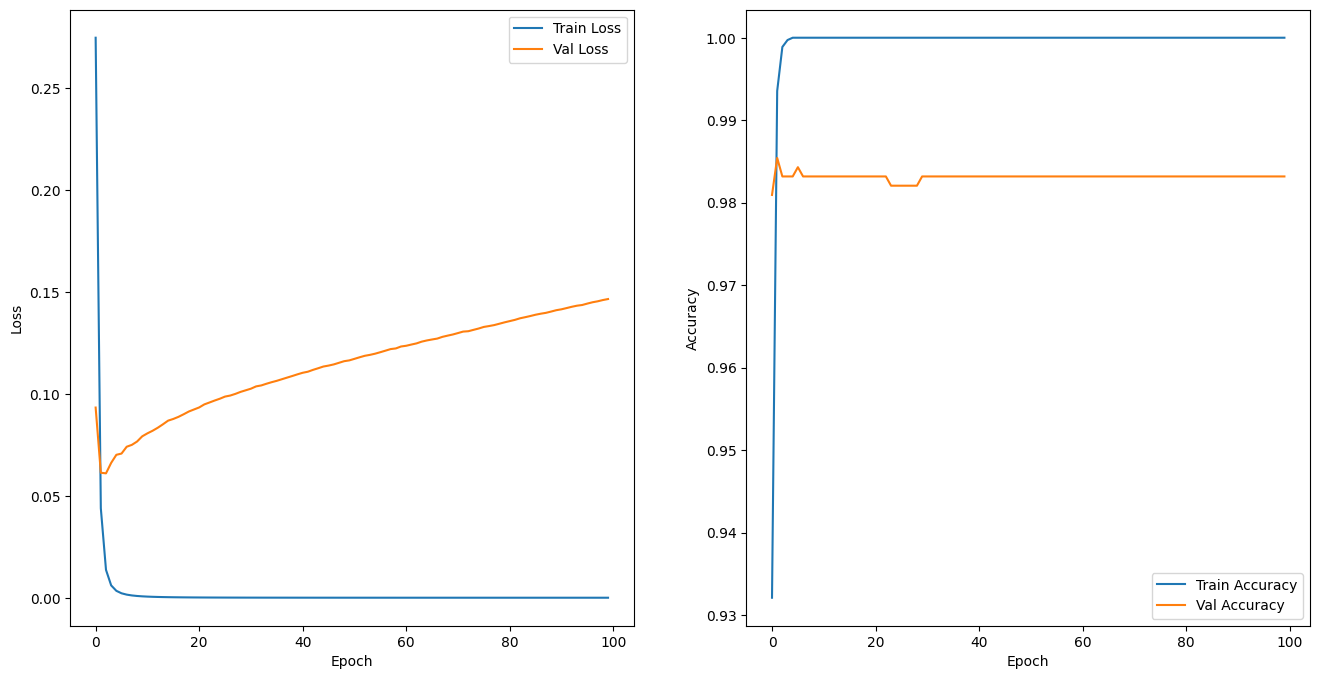

In [161]:
import matplotlib.pyplot as plt

def plot_history(history):
  hist = pd.DataFrame(history.history)
  hist['epoch'] = history.epoch

  plt.figure(figsize=(16,8))
  plt.subplot(1,2,1)
  plt.xlabel('Epoch')
  plt.ylabel('Loss')
  plt.plot(hist['epoch'], hist['loss'], label='Train Loss')
  plt.plot(hist['epoch'], hist['val_loss'], label='Val Loss')
  plt.legend()

  plt.subplot(1,2,2)
  plt.xlabel('Epoch')
  plt.ylabel('Accuracy')
  plt.plot(hist['epoch'], hist['accuracy'], label='Train Accuracy')
  plt.plot(hist['epoch'], hist['val_accuracy'], label='Val Accuracy')
  plt.legend()

  plt.show()

plot_history(history)

# dir(history)

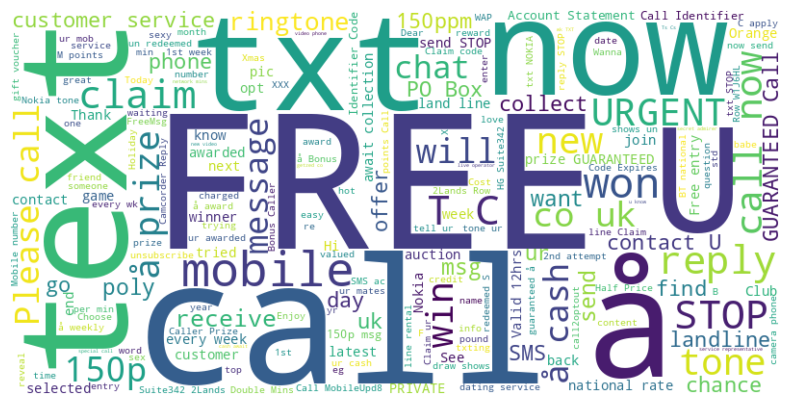

In [169]:
import pandas as pd
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import numpy as np


# Spam 데이터 불러오기 (예시)
# 실제 데이터 파일 경로에 따라서 적절하게 수정해야 합니다.
df = pd.read_csv('./spam.csv', encoding='ISO-8859-1')
# 'label'이 'spam'인 데이터 선택
spam_data = df[df['v1'] == 'spam']

# 'text' 열의 데이터를 하나의 문자열로 합치기
spam_text = ' '.join(spam_data['v2'])

# WordCloud에 사용할 이미지 경로
mask_image_path = './spammask.png'  # 이미지 파일 경로로 수정

# 이미지 불러오기
mask_image = np.array(Image.open(mask_image_path))


# WordCloud 생성
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(spam_text)

# 시각화
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()
